# Recepie Review and User Feedback Dataset

# CRIPS - DM Methodology
 1. Bussiness Understanding.
 2. Data Understanding. 
 3. Data Preparation.
 4. Modelling. 
 5. Evaluation. 
 6. Deplotment.

### 1: Business Understanding

Recipe Review Sentiment Analysis

Business Objective:
- Analyze sentiment from recipe reviews and ratings
- Extract insights about user satisfaction and feedback patterns
- Build predictive model for sentiment classification

Dataset Description:
- Source: Recipe reviews and ratings dataset
- Size: >18,000 reviews
- Key features: User reviews, ratings (1-5 stars), engagement metrics

Success Metrics:
1. Model Performance:
   - Classification accuracy >80%
   - Balanced precision/recall across sentiment classes
2. Business Value:
   - Identify patterns in user satisfaction
   - Extract actionable insights for recipe improvement
   - Understand factors influencing positive/negative reviews


### 2 Data Understanding

####  2.1 Dependecies

In [19]:
# Standard libraries for data manipulation
import numpy as np
import pandas as pd
from typing import Dict, List, Tuple, Any

# Text processing 
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

# Download required NLTK data
nltk.download(['punkt', 'stopwords', 'vader_lexicon'])
nltk.download('punkt_tab')

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Deep learning
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_theme(style="whitegrid", palette="dark") 

[nltk_data] Downloading package punkt to /home/sye729/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sye729/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/sye729/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/sye729/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


#### 2.2 Load the dataset

In [2]:
# Define paths
DATA_PATH = "../data/raw/Recipe Reviews and User Feedback Dataset.csv"
PROCESSED_PATH = "../data/processed/Task_3_processed/"
FIGURE_PATH = "../reports/figures/Task_3/"
EVAL_PATH = "../reports/model_evaluations/Task_3/"

# Load data
df = pd.read_csv(DATA_PATH)

#### 2.3  Display Basic Information

In [3]:
# Display basic dataset information
print("Dataset Shape:", df.shape)
print("\nFeature Information:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nFirst few rows:")
display(df.head())
print("\nLast few rows")
display(df.tail())

Dataset Shape: (18182, 15)

Feature Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       18182 non-null  int64 
 1   recipe_number    18182 non-null  int64 
 2   recipe_code      18182 non-null  int64 
 3   recipe_name      18182 non-null  object
 4   comment_id       18182 non-null  object
 5   user_id          18182 non-null  object
 6   user_name        18182 non-null  object
 7   user_reputation  18182 non-null  int64 
 8   created_at       18182 non-null  int64 
 9   reply_count      18182 non-null  int64 
 10  thumbs_up        18182 non-null  int64 
 11  thumbs_down      18182 non-null  int64 
 12  stars            18182 non-null  int64 
 13  best_score       18182 non-null  int64 
 14  text             18180 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.1+ MB

Missing Values:
Unnamed: 

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...



Last few rows


,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,1622717977,0,0,0,5,100,This Strawberry Cake has been a family favorit...
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,1613036720,0,0,0,5,100,<p>I received endless compliments on this cake...
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,1622717844,0,0,0,5,100,This cake was delicious and so moist! I didn&#...
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,1622717233,0,0,0,5,100,I just made this too. It is wonderful. As fo...
18181,118,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_262637,u_1oKW6W12cOLxiMzjA7j8nTqwFWG,nopalito,1,1622717625,0,1,0,5,193,"OMG, you must make this cake. I made it for my..."


#### 2.4 Basica Statistics

In [4]:
# Generate basic statistics for numerical columns
print("Statistical Summary:")
print(df.describe())

# Display value counts for ratings
print("\nRating Distribution:")
print(df['stars'].value_counts().sort_index())

Statistical Summary:
         Unnamed: 0  recipe_number    recipe_code  user_reputation  \
count  18182.000000   18182.000000   18182.000000     18182.000000   
mean     121.465295      38.689363   21773.667253         2.159608   
std      116.747893      29.786647   23965.109637        10.014666   
min        0.000000       1.000000     386.000000         0.000000   
25%       45.000000      12.000000    6086.000000         1.000000   
50%       91.000000      33.000000   14600.000000         1.000000   
75%      150.000000      64.000000   33121.000000         1.000000   
max      724.000000     100.000000  191775.000000       520.000000   

         created_at   reply_count     thumbs_up   thumbs_down         stars  \
count  1.818200e+04  18182.000000  18182.000000  18182.000000  18182.000000   
mean   1.623710e+09      0.014630      1.089264      0.549335      4.288802   
std    5.468697e+06      0.137974      4.201004      3.470124      1.544786   
min    1.613035e+09      0.00000

#### 2.5 Exploratory Data Analysis

##### 2.5.1 Star Ratin Distribution

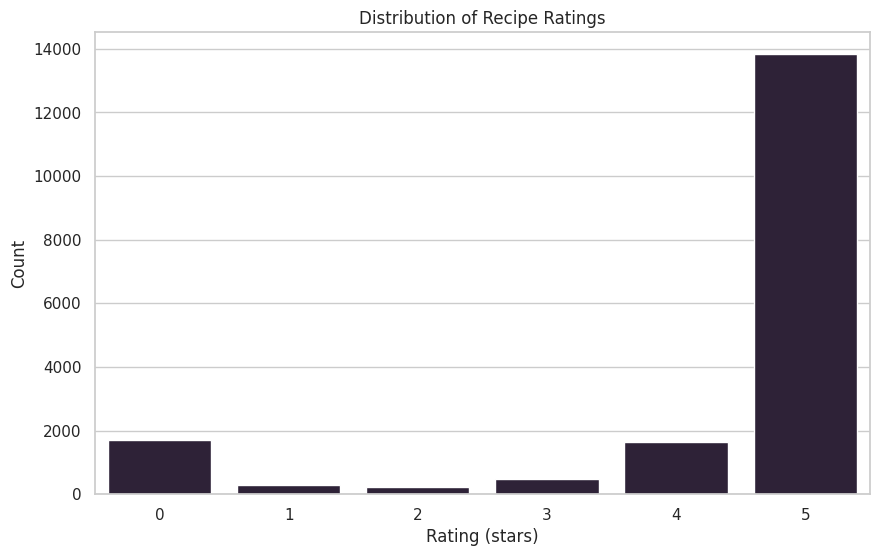

In [9]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='stars')
plt.title('Distribution of Recipe Ratings')
plt.xlabel('Rating (stars)')
plt.ylabel('Count')
plt.savefig(f'{FIGURE_PATH}/rating_distribution.png')
plt.show()

##### 2.5.2 Text Analysis

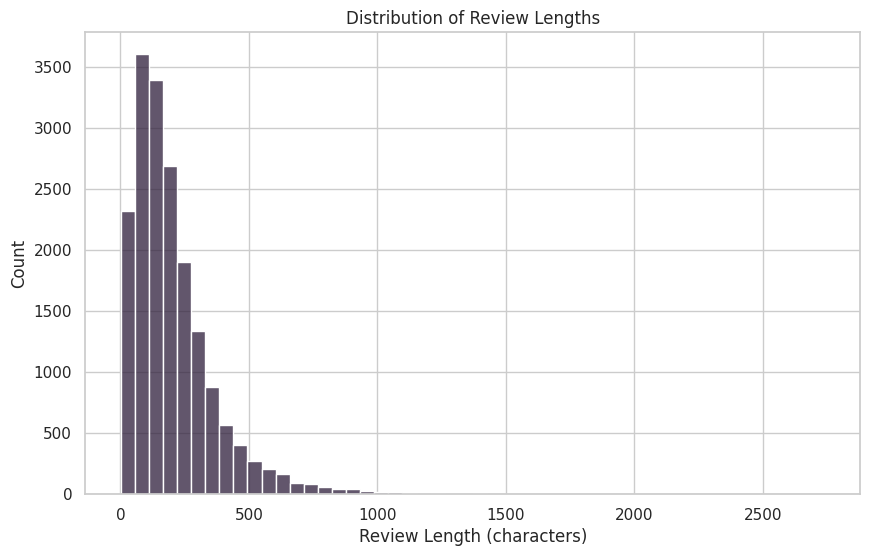


Review Length Statistics:
count    18180.000000
mean       203.909681
std        172.455624
min          1.000000
25%         90.000000
50%        161.000000
75%        266.000000
max       2742.000000
Name: text_length, dtype: float64


In [10]:
# Add text length feature
df['text_length'] = df['text'].str.len()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.savefig(f'{FIGURE_PATH}/text_length_distribution.png')
plt.show()

# Print text length statistics
print("\nReview Length Statistics:")
print(df['text_length'].describe())

##### 2.5.3 User Enagament

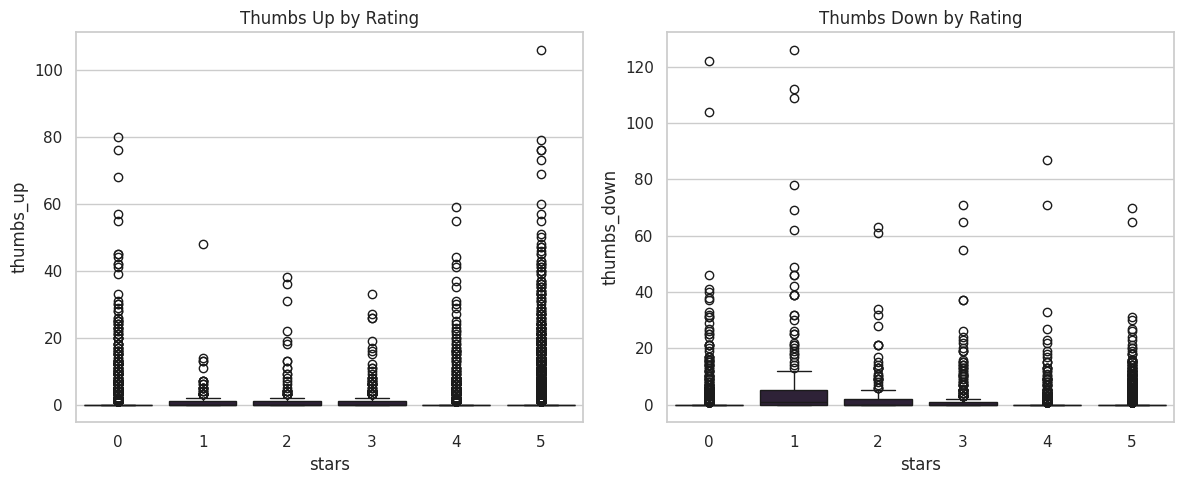

In [11]:
# Create engagement visualization
plt.figure(figsize=(12, 5))

# Thumbs up/down by rating
plt.subplot(121)
sns.boxplot(data=df, x='stars', y='thumbs_up')
plt.title('Thumbs Up by Rating')

plt.subplot(122)
sns.boxplot(data=df, x='stars', y='thumbs_down')
plt.title('Thumbs Down by Rating')

plt.tight_layout()
plt.savefig(f'{FIGURE_PATH}/engagement_by_rating.png')
plt.show()

### 3. Data Preparation
#### 3.1 Data Cleaning and Filtering
- Remove 0 ratings (no feedback)
- Handle missing values in text
- Clean text data (remove special characters, URLs, etc.)

In [12]:
# 3.1 Data Cleaning and Filtering
import pickle


def clean_and_prepare_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Clean and prepare data for modeling.
    """
    # Remove 0 ratings
    df_cleaned = df[df['stars'] > 0].copy()
    
    # Clean text
    df_cleaned['cleaned_text'] = df_cleaned['text'].apply(lambda x: 
        clean_text(x) if pd.notna(x) else '')
    
    # Convert ratings to sentiment
    df_cleaned['sentiment'] = df_cleaned['stars'].apply(lambda x:
        'negative' if x <= 2
        else 'neutral' if x == 3
        else 'positive'
    )
    
    # Remove empty texts
    df_cleaned = df_cleaned[df_cleaned['cleaned_text'].str.len() > 0]
    
    return df_cleaned

def clean_text(text: str) -> str:
    """
    Clean text data.
    """
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

# 3.2 Feature Engineering
def engineer_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create additional features.
    """
    # Text length features
    df['text_length'] = df['cleaned_text'].str.len()
    df['word_count'] = df['cleaned_text'].str.split().str.len()
    
    # Normalize engagement metrics
    df['normalized_thumbs_up'] = df['thumbs_up'] / df['thumbs_up'].max()
    df['normalized_thumbs_down'] = df['thumbs_down'] / df['thumbs_down'].max()
    
    return df

# 3.3 Text Preprocessing
def preprocess_text(df: pd.DataFrame, max_len: int = 266) -> Tuple[np.ndarray, Tokenizer]:
    """
    Preprocess text for modeling.
    """
    # Initialize tokenizer
    tokenizer = Tokenizer(num_words=10000)  # Based on vocabulary size analysis
    tokenizer.fit_on_texts(df['cleaned_text'])
    
    # Convert texts to sequences
    sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
    
    # Pad sequences
    padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')
    
    return padded_sequences, tokenizer

# Execute data preparation
df_cleaned = clean_and_prepare_data(df)
df_features = engineer_features(df_cleaned)
X_padded, tokenizer = preprocess_text(df_features)

# Display class distribution
print("Sentiment Distribution:")
print(df_features['sentiment'].value_counts())
print("\nShape of padded sequences:", X_padded.shape)

# Save processed data
df_features.to_csv(f"{PROCESSED_PATH}/processed_data.csv", index=False)
with open(f"{PROCESSED_PATH}/tokenizer.pkl", 'wb') as f:
    pickle.dump(tokenizer, f)

Sentiment Distribution:
sentiment
positive    15470
negative      512
neutral       489
Name: count, dtype: int64

Shape of padded sequences: (16471, 266)


### 3.2 Feature Engineering
- Convert ratings to sentiment categories:
  * 1-2 stars → Negative
  * 3 stars → Neutral
  * 4-5 stars → Positive
- Create text length features
- Normalize user engagement metrics

In [14]:
# 3.4 Advanced Feature Engineering
def create_advanced_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create advanced features using VADER and additional metrics.
    """
    # Initialize VADER
    sid = SentimentIntensityAnalyzer()
    
    # Add VADER sentiment scores
    df['vader_scores'] = df['cleaned_text'].apply(lambda x: 
        sid.polarity_scores(x))
    df['vader_compound'] = df['vader_scores'].apply(lambda x: x['compound'])
    df['vader_pos'] = df['vader_scores'].apply(lambda x: x['pos'])
    df['vader_neg'] = df['vader_scores'].apply(lambda x: x['neg'])
    
    # User reputation features
    df['is_frequent_reviewer'] = df['user_reputation'] > df['user_reputation'].median()
    
    # Drop intermediate column
    df = df.drop('vader_scores', axis=1)
    
    return df

# 3.5 Handle Class Imbalance
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

def balance_dataset(X: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Balance dataset using SMOTE.
    """
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    print("Original dataset shape:", dict(zip(*np.unique(y, return_counts=True))))
    print("Resampled dataset shape:", dict(zip(*np.unique(y_resampled, return_counts=True))))
    
    return X_resampled, y_resampled

def calculate_class_weights(y: np.ndarray) -> Dict:
    """
    Calculate class weights for balanced model training.
    """
    class_counts = np.bincount(y)
    total = len(y)
    class_weights = {i: total / (len(class_counts) * count) 
                    for i, count in enumerate(class_counts)}
    return class_weights

# 3.6 Final Dataset Preparation
def prepare_final_dataset(df: pd.DataFrame, X_text: np.ndarray) -> Tuple:
    """
    Prepare final dataset for modeling.
    """
    # Prepare features
    numerical_features = ['normalized_thumbs_up', 'normalized_thumbs_down',
                         'vader_compound', 'vader_pos', 'vader_neg',
                         'text_length', 'word_count']
    
    # Scale numerical features
    scaler = StandardScaler()
    X_numerical = scaler.fit_transform(df[numerical_features])
    
    # Combine features
    X_combined = np.hstack([X_text, X_numerical])
    
    # Encode target
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df['sentiment'])
    
    # Split dataset
    X_train, X_temp, y_train, y_temp = train_test_split(
        X_combined, y, test_size=0.3, random_state=42, stratify=y
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )
    
    # Balance training data
    X_train_balanced, y_train_balanced = balance_dataset(X_train, y_train)
    
    # Calculate class weights
    class_weights = calculate_class_weights(y_train)
    
    return (X_train_balanced, X_val, X_test,
            y_train_balanced, y_val, y_test,
            class_weights, label_encoder, scaler)

# Execute advanced preparation steps
print("Creating advanced features...")
df_advanced = create_advanced_features(df_features)

print("\nPreparing final dataset...")
(X_train, X_val, X_test,
 y_train, y_val, y_test,
 class_weights, label_encoder, scaler) = prepare_final_dataset(
    df_advanced, X_padded)

# Save processed artifacts
print("\nSaving processed data...")
np.save(f"{PROCESSED_PATH}/X_train.npy", X_train)
np.save(f"{PROCESSED_PATH}/X_val.npy", X_val)
np.save(f"{PROCESSED_PATH}/X_test.npy", X_test)
np.save(f"{PROCESSED_PATH}/y_train.npy", y_train)
np.save(f"{PROCESSED_PATH}/y_val.npy", y_val)
np.save(f"{PROCESSED_PATH}/y_test.npy", y_test)

# Save preprocessing objects
with open(f"{PROCESSED_PATH}/preprocessing_objects.pkl", 'wb') as f:
    pickle.dump({
        'label_encoder': label_encoder,
        'scaler': scaler,
        'class_weights': class_weights
    }, f)

print("\nFeature Summary:")
print(f"Text features shape: {X_padded.shape}")
print(f"Total features: {X_train.shape[1]}")
print("\nClass distribution after balancing:")
print(pd.Series(y_train).value_counts().sort_index())

Creating advanced features...

Preparing final dataset...
Original dataset shape: {np.int64(0): np.int64(359), np.int64(1): np.int64(342), np.int64(2): np.int64(10828)}
Resampled dataset shape: {np.int64(0): np.int64(10828), np.int64(1): np.int64(10828), np.int64(2): np.int64(10828)}

Saving processed data...

Feature Summary:
Text features shape: (16471, 266)
Total features: 273

Class distribution after balancing:
0    10828
1    10828
2    10828
Name: count, dtype: int64


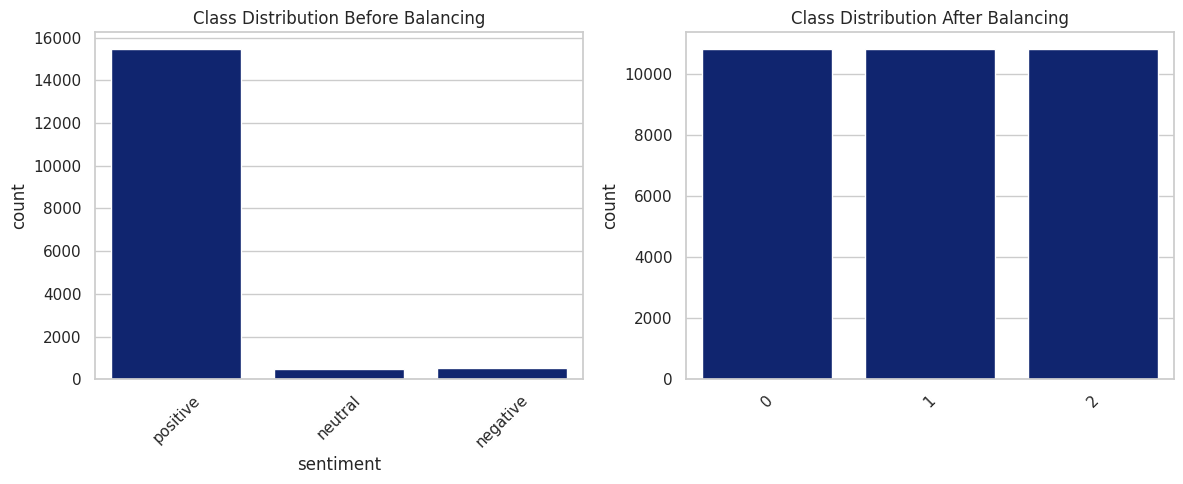

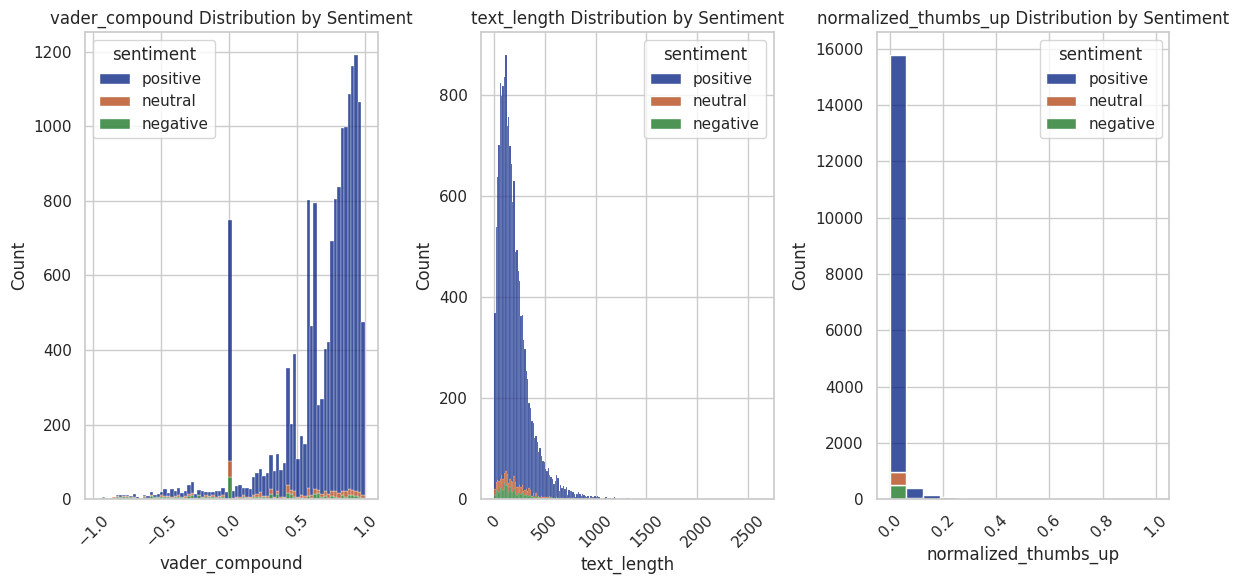

In [17]:
# Visualize class balance before and after SMOTE
plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.countplot(data=df_advanced, x='sentiment')
plt.title('Class Distribution Before Balancing')
plt.xticks(rotation=45)

plt.subplot(122)
sns.countplot(x=y_train)
plt.title('Class Distribution After Balancing')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(f"{FIGURE_PATH}/class_balance_comparison.png")
plt.show()

# Visualize feature distributions
plt.figure(figsize=(12, 6))
for i, feature in enumerate(['vader_compound', 'text_length', 'normalized_thumbs_up']):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df_advanced, x=feature, hue='sentiment', multiple="stack")
    plt.title(f'{feature} Distribution by Sentiment')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(f"{FIGURE_PATH}/feature_distributions.png")
plt.show()

### 3.3 Text Preprocessing
- Tokenization
- Remove stopwords
- Handle common recipe-specific terms
- Sequence padding (based on 75th percentile length: 266 characters)

Starting text preprocessing...
Tokenizing texts...
Fitting tokenizer...
Padding sequences to length 266...

Preprocessing Statistics:
vocabulary_size: 14902.00
max_sequence_length: 266.00
average_sequence_length: 18.15
total_unique_words: 14898.00
samples_truncated: 0.00

Saving preprocessing artifacts...


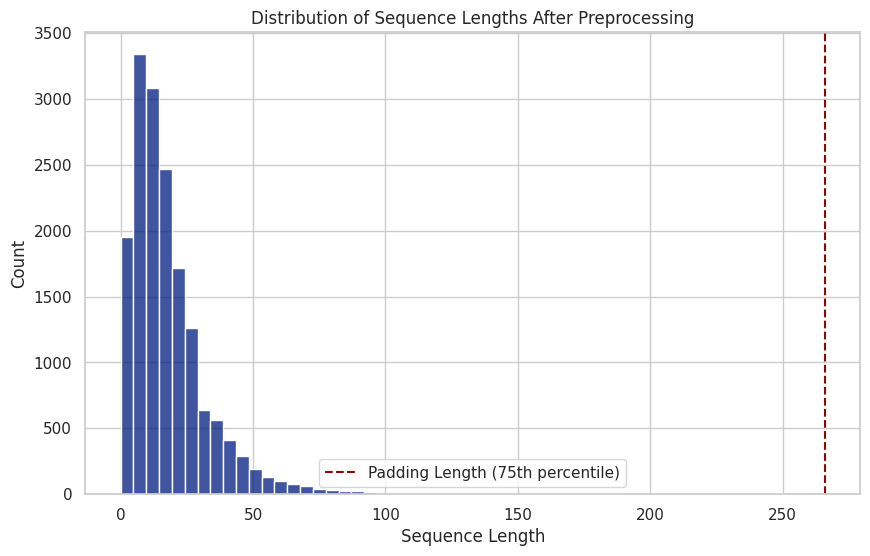


Most common words in the vocabulary:
         word  frequency
0        used       3999
1        good       3315
2   delicious       2903
3       great       2757
4       added       2657
5        easy       2617
6         one       2297
7      family       2285
8         use       2279
9        like       2161
10       also       2146
11      loved       2125
12       love       1781
13       cake       1754
14        add       1730
15    instead       1701
16       soup       1668
17    chicken       1570
18     really       1557
19     cheese       1555


In [20]:
# 3.3 Text Preprocessing
def preprocess_text_data(df: pd.DataFrame, max_length: int = 266) -> Tuple[np.ndarray, Tokenizer, Dict[str, Any]]:
    """
    Comprehensive text preprocessing pipeline.
    
    Args:
        df: DataFrame containing 'cleaned_text' column
        max_length: Maximum sequence length for padding (using 75th percentile)
    
    Returns:
        Tuple containing padded sequences, tokenizer, and preprocessing stats
    """
    print("Starting text preprocessing...")
    
    # 1. Define recipe-specific stopwords
    recipe_stopwords = {
        'recipe', 'recipes', 'cook', 'cooking', 'made', 'make', 'making',
        'food', 'dish', 'meal', 'ingredients', 'kitchen', 'minutes', 'hour',
        'hours', 'time'
    }
    stop_words = set(stopwords.words('english')).union(recipe_stopwords)
    
    # 2. Text cleaning and tokenization
    def clean_and_tokenize(text: str) -> List[str]:
        # Convert to lowercase and remove special characters
        text = str(text).lower()
        text = re.sub(r'[^\w\s]', ' ', text)
        
        # Remove stopwords and recipe-specific terms
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stop_words]
        
        # Remove numeric tokens and single characters
        tokens = [word for word in tokens if not word.isnumeric() and len(word) > 1]
        
        return tokens
    
    # Apply preprocessing to all texts
    print("Tokenizing texts...")
    df['tokenized_text'] = df['cleaned_text'].apply(clean_and_tokenize)
    
    # 3. Initialize and fit tokenizer
    print("Fitting tokenizer...")
    tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
    tokenizer.fit_on_texts(df['tokenized_text'].apply(' '.join))
    
    # 4. Convert texts to sequences
    sequences = tokenizer.texts_to_sequences(df['tokenized_text'].apply(' '.join))
    
    # 5. Pad sequences
    print(f"Padding sequences to length {max_length}...")
    padded_sequences = pad_sequences(
        sequences,
        maxlen=max_length,
        padding='post',
        truncating='post'
    )
    
    # Collect preprocessing statistics
    stats = {
        'vocabulary_size': len(tokenizer.word_index) + 1,
        'max_sequence_length': max_length,
        'average_sequence_length': np.mean([len(seq) for seq in sequences]),
        'total_unique_words': len(set([word for tokens in df['tokenized_text'] for word in tokens])),
        'samples_truncated': sum(len(seq) > max_length for seq in sequences)
    }
    
    print("\nPreprocessing Statistics:")
    for key, value in stats.items():
        print(f"{key}: {value:.2f}")
    
    return padded_sequences, tokenizer, stats

# Execute text preprocessing
padded_sequences, tokenizer, preprocessing_stats = preprocess_text_data(df_cleaned)

# Save preprocessing artifacts
print("\nSaving preprocessing artifacts...")
with open(f"{PROCESSED_PATH}/text_preprocessing_artifacts.pkl", 'wb') as f:
    pickle.dump({
        'tokenizer': tokenizer,
        'preprocessing_stats': preprocessing_stats
    }, f)

# Visualize sequence lengths distribution
plt.figure(figsize=(10, 6))
sequence_lengths = [len(seq) for seq in tokenizer.texts_to_sequences(df_cleaned['tokenized_text'].apply(' '.join))]
sns.histplot(sequence_lengths, bins=50)
plt.axvline(x=266, color='r', linestyle='--', label='Padding Length (75th percentile)')
plt.title('Distribution of Sequence Lengths After Preprocessing')
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.legend()
plt.savefig(f"{FIGURE_PATH}/sequence_lengths_distribution.png")
plt.show()

# Display most common words
print("\nMost common words in the vocabulary:")
word_freq = pd.DataFrame(
    sorted(tokenizer.word_counts.items(), key=lambda x: x[1], reverse=True)[:20],
    columns=['word', 'frequency']
)
print(word_freq)

### 4. Data Modeling
#### 4.1 Model Architecture
- LSTM-based model with embedding layer
- Input shape: (266, ) based on padding length
- Vocabulary size: 14,902
- Output: 3 classes (negative, neutral, positive)

In [21]:
def build_sentiment_model(
    vocab_size: int,
    max_length: int,
    embedding_dim: int = 100,
    lstm_units: int = 64
) -> Sequential:
    """
    Build LSTM model for sentiment analysis.
    
    Args:
        vocab_size: Size of vocabulary
        max_length: Maximum sequence length
        embedding_dim: Embedding dimension
        lstm_units: Number of LSTM units
    """
    model = Sequential([
        # Embedding layer
        Embedding(input_dim=vocab_size,
                 output_dim=embedding_dim,
                 input_length=max_length),
        
        # LSTM layers
        LSTM(lstm_units, return_sequences=True),
        Dropout(0.3),
        
        LSTM(lstm_units//2),
        Dropout(0.3),
        
        # Dense layers
        Dense(32, activation='relu'),
        Dropout(0.3),
        
        # Output layer
        Dense(3, activation='softmax')
    ])
    
    # Compile model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Model training configuration
EMBEDDING_DIM = 100
LSTM_UNITS = 64
BATCH_SIZE = 32
EPOCHS = 10

# Build model
model = build_sentiment_model(
    vocab_size=preprocessing_stats['vocabulary_size'],
    max_length=preprocessing_stats['max_sequence_length'],
    embedding_dim=EMBEDDING_DIM,
    lstm_units=LSTM_UNITS
)

# Display model summary
model.summary()

# Set up callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )
]

# Train model
print("\nStarting model training...")
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    class_weight=class_weights
)

# Save model and training history
model.save(f"{PROCESSED_PATH}/sentiment_model.h5")
with open(f"{PROCESSED_PATH}/training_history.pkl", 'wb') as f:
    pickle.dump(history.history, f)

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(122)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig(f"{FIGURE_PATH}/training_history.png")
plt.show()

/home/sye729/projects/tf/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1731377581.576512  128583 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6073 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Starting model training...
Epoch 1/10


E0000 00:00:1731377586.954287  141159 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
2024-11-12 02:13:06.955282: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at cudnn_rnn_ops.cc:1769 : INVALID_ARGUMENT: Dnn is not supported
2024-11-12 02:13:06.955331: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: INVALID_ARGUMENT: Dnn is not supported
	 [[{{function_node __inference_one_step_on_data_3444}}{{node sequential_1/lstm_1/CudnnRNNV3}}]]


InvalidArgumentError: Graph execution error:

Detected at node sequential_1/lstm_1/CudnnRNNV3 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/home/linuxbrew/.linuxbrew/opt/python@3.12/lib/python3.12/asyncio/base_events.py", line 641, in run_forever

  File "/home/linuxbrew/.linuxbrew/opt/python@3.12/lib/python3.12/asyncio/base_events.py", line 1986, in _run_once

  File "/home/linuxbrew/.linuxbrew/opt/python@3.12/lib/python3.12/asyncio/events.py", line 88, in _run

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_128583/805261672.py", line 74, in <module>

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 51, in train_step

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/keras/src/layers/layer.py", line 899, in __call__

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/keras/src/models/sequential.py", line 213, in call

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/keras/src/models/functional.py", line 182, in call

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/keras/src/models/functional.py", line 584, in call

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/keras/src/layers/layer.py", line 899, in __call__

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/keras/src/layers/rnn/lstm.py", line 570, in call

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py", line 406, in call

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/keras/src/layers/rnn/lstm.py", line 537, in inner_loop

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/keras/src/backend/tensorflow/rnn.py", line 841, in lstm

  File "/home/sye729/projects/tf/lib/python3.12/site-packages/keras/src/backend/tensorflow/rnn.py", line 933, in _cudnn_lstm

Dnn is not supported
	 [[{{node sequential_1/lstm_1/CudnnRNNV3}}]] [Op:__inference_one_step_on_iterator_3533]

#### 4.2 Model Configuration
- Embedding size
- LSTM units and layers
- Dropout for regularization
- Dense layers configuration

#### 4.3 Training Setup
- Loss function: Categorical crossentropy
- Optimizer: Adam
- Metrics: Accuracy, F1-score
- Early stopping criteria